<a href="https://colab.research.google.com/github/ajaykumar080286/DeepLearning/blob/master/zero_initialization_simoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout


In [14]:
df=pd.read_csv('1.ushape.csv')

In [15]:
df.columns = ["X", "Y", "class"]
df = df.round(2)
df.head()


,X,Y,class
0,2.12,-0.05,1.0
1,0.88,-0.08,0.0
2,-0.06,-0.04,1.0
3,0.83,-0.54,1.0
4,2.11,0.66,1.0


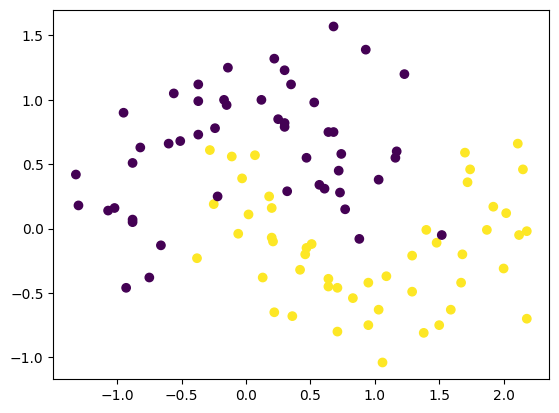

In [16]:
plt.scatter(df['X'], df['Y'], c=df['class'])

In [17]:
model=Sequential()


model.add(Dense(2, activation='sigmoid', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
initial_weights = model.get_weights()

In [20]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [21]:
model.set_weights(initial_weights)
initial_weights

[array([[0., 0.],
        [0., 0.]]),
 array([0., 0.]),
 array([[0.],
        [0.]]),
 array([0.])]

In [25]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [26]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.5032 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4563 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5188 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5110 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5266 - loss: 0.6928 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5032 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5110 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5500 - loss: 0.6924 - val_accuracy: 0.5000 - val_loss

In [33]:
model.get_weights()

[array([[ 0.47658506,  0.47658506],
        [-0.5097894 , -0.5097894 ]], dtype=float32),
 array([-0.05987301, -0.05987301], dtype=float32),
 array([[0.12435773],
        [0.12435773]], dtype=float32),
 array([-0.01008543], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

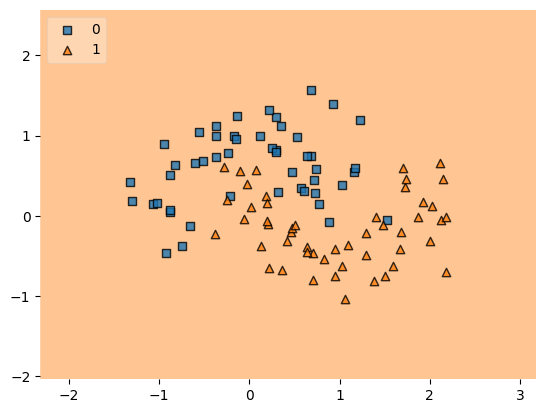

In [34]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values,y.values.astype('int'), clf=model, legend=2)
